Here I will outline Bayesian Inference and general bayes techniques in python

Examples include coin flips biasing, hyperparameter estimation, etc

http://tinyheero.github.io/2017/03/08/how-to-bayesian-infer-101.html#the-coin-flipping-example

Bayes’ rule becomes extremely powerful in Bayesian inference. The link happens when we start to interpret the variables of Bayes’ rule as parameters (θ) of a model and observed data (D):

P(X | Y)P(θ | D)=P(Y | X) P(X)P(Y)=P(D | θ) P(θ)P(D)


In this post, we will learn exactly how Bayes’ rule is used in Bayesian inference by going through a specific example of coin tossing. A lot of this post and examples are inspired by John K. Kruschke’s “Doing Bayesian Data Analysis”. An incredible book that I have been using for my entry into world of Bayesian statistics. I would highly recommend anyone interested in Bayesian statistics to get this book.

## The Coin Flipping Example

Consider the scenario where you found a coin on the side of a street that had an odd looking geometry, unlike anything you have ever seen before. It still has two sides (heads and a tail), and you start to wonder:

What is probability of getting a head on a given flip with this coin?

Given your knowledge of how a typical coin is, your prior guess is that is should be probably 0.5. But given the strange looking geometry, you also entertain the idea that it could be something like 0.4 or 0.6, but think these values are less probable than 0.5. You then proceed to flip the coin 100 times (because you are really bored and have time on your hands) and you notice that you get 83 heads. Given this observed data now, what is your guess at the probability of getting a head on a given flip?

If we think back to our examples from the Bayes’ Rule post, we can see that this particular example is not that dissimilar:

We have a prior belief of what the probability of getting a heads is (0.5).
We have some observed data, which is 83 heads out of 100 coin tosses.
We need to update our belief of this probability now that we have some observed data.
There is however one key difference in this particular example compared to our previous examples. Our prior is not a single fixed value, but rather a series of different possible values. It could be 0.5 or 0.4 or 0.6….in fact it could be any value between 0 and 1! Moreover, the possible values are not all equally likely. For instance, we have a strong belief that it could be 0.5 (because of what we know about coins in general), and while 0.4 and 0.6 or any other value is possible we still think 0.5 is more probable. Visually, we could have something like:

In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

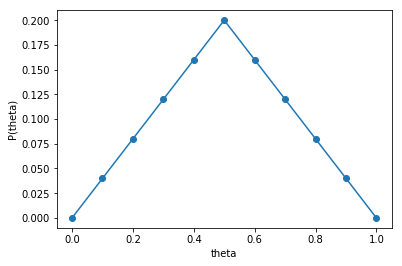

In [2]:
# Prior distribution, triangle for coin flips
theta = np.linspace(0,1, 11)
P_theta = -abs(theta-0.5)+0.5
P_theta = P_theta/2.5
plt.plot(theta, P_theta, '-o')
plt.xlabel('theta')
plt.ylabel('P(theta)')
plt.show()

Here we have 10 different possibilities of theta and their associated probabilities. In fact, what we have just described is a probability distribution that was defined in the Bayes’ Rule! So if we think of our prior as a random variable, θ, then what we actually have is a prior probability distribution. What implications does this have? Well this ends up affecting how we measure the likelihood because before our likelihood was based on a single prior value. Instead, our likelihood essentially becomes a function of a series of candidate θ values. In other words, the probability of seeing the observed data is different depending on what the value of θ is

## Steps of Bayesian Inference

Now that we have given this simple example of a situation, we can walk through an example of how we can answer the aforementioned question (i.e. What is probability of getting a head on a given flip with this coin?) in a Bayesian way. To do any Bayesian inference, we follow a 4 step process:

- Identify the observed data you are working with.
- Construct a probabilistic model to represent the data (likelihood).
- Specify prior distributions over the parameters of your probabilistic model (prior).
- Collect data and apply Bayes’ rule to re-allocate credibility across the possible parameter values (posterior).

Let us walk through these steps one by one in the context of this example.

## Step 1: Identify the Observed Data

In this example, we have a coin that when flipped gives us one of two possible outcomes: heads or tails. We can use the random variable, Y, to denote the outcome and assign it to 1 if it is heads and 0 if it is tails. These values are not ordinal, and merely represent a simplified way to represent heads or tails.

In [3]:
from scipy.stats import binom

In [11]:
# Now, just use the binomial distribution to get a sample
n_trials = 20
prob_test = 0.45
num_pts_expt = 100
D = np.random.binomial(n_trials, prob_test, 1)
P_D = binom.pmf(D, n_trials, prob_test)[0]
print('P(D) is : {a:0.3f}'.format(a = P_D))

P(D) is : 0.119


## Step 2: Set Prior Distribution

This is where your assumptions come in.

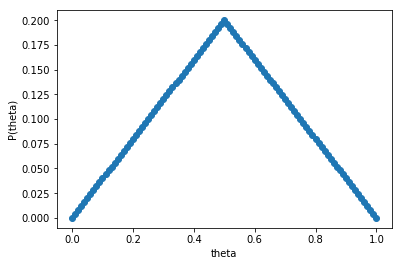

In [12]:
# Prior distribution, triangle for coin flips
theta = np.linspace(0,1, num_pts_expt+1)
P_theta = -abs(theta-0.5)+0.5
# Normalize the prior distribution
P_theta = P_theta/2.5
# Make a plot
plt.plot(theta, P_theta, '-o')
plt.xlabel('theta')
plt.ylabel('P(theta)')
plt.show()

## Step 3: Construct a Probabilistic Model to Represent the Data

Assume and fit a distribution to the observed data. For coin flips, this will be binomial.

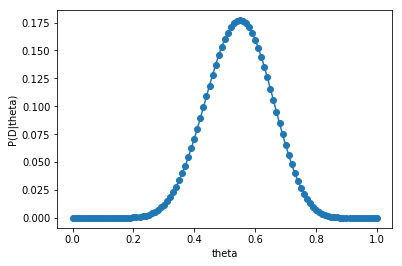

In [13]:
# Get likelihood for each given parameter
theta = np.linspace(0,1, num_pts_expt+1)
P_D_theta = []
for el in theta:
    P_D_theta.append(binom.pmf(D, n_trials, el)[0])
# Make a plot 
plt.plot(theta, P_D_theta, '-o')
plt.xlabel('theta')
plt.ylabel('P(D|theta)')
plt.show()

## Step 4: Calculate Posterior Distribution

Use Bayes' Theorem

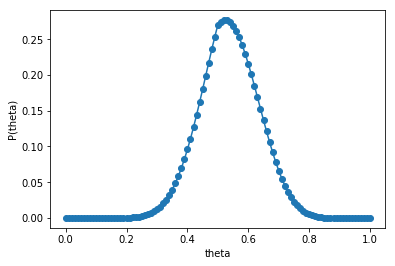

In [14]:
# Bayes'
P_theta_D = P_D_theta*P_theta/P_D
# Make a Plot
plt.plot(theta, P_theta_D, '-o')
plt.xlabel('theta')
plt.ylabel('P(theta)')
plt.show()